In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as mlt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

FILE SECTION

In [ ]:
data = pd.read_csv("/content/Bengaluru_House_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
data = data.drop(['society'], axis = 1)

In [ ]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [ ]:
data = data[data['size'].notna()]
data.isnull().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [ ]:
data = data[data['location'].notna()]
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [ ]:
data = data[data['bath'].notna()]
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         536
price             0
dtype: int64

In [ ]:
data = data[data['balcony'].notna()]
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  int64  
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 893.7+ KB


In [ ]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [ ]:
data['availability'] = data['availability'].replace('Ready To Move', 0)
data.availability.unique()

array(['19-Dec', 0, '18-Feb', '18-Nov', '18-May', '20-Dec', '17-Oct',
       '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr', '20-Aug',
       '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr', '18-Jun',
       '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul', '18-Jul',
       '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May', '17-Jun',
       '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec', '16-Mar',
       '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May', '17-Nov',
       '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan', '17-Mar',
       '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov', '21-Mar',
       '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug', '14-Nov',
       '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul', '16-Sep',
       '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'], dtype=object)

In [ ]:
print(data['availability'][0])
print(type(data['availability'][0]))

19-Dec
<class 'str'>


In [ ]:
editing_data = data[data['availability']!=0]

In [ ]:
editing_data['availability'] = pd.to_datetime(editing_data['availability'][:]+"-2023", format = '%d-%b-%Y')

<ipython-input-17-d30ac757d6d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data['availability'] = pd.to_datetime(editing_data['availability'][:]+"-2023", format = '%d-%b-%Y')


In [ ]:
editing_data['days_to_move'] = (editing_data['availability'].dt.date - datetime.today().date()).dt.days

<ipython-input-18-d568b881c475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data['days_to_move'] = (editing_data['availability'].dt.date - datetime.today().date()).dt.days


In [ ]:
editing_data.loc[editing_data['days_to_move']<0, "days_to_move"] += 365

In [ ]:
editing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     2633 non-null   object        
 1   availability  2633 non-null   datetime64[ns]
 2   location      2633 non-null   object        
 3   size          2633 non-null   int64         
 4   total_sqft    2633 non-null   object        
 5   bath          2633 non-null   float64       
 6   balcony       2633 non-null   float64       
 7   price         2633 non-null   float64       
 8   days_to_move  2633 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 205.7+ KB


In [ ]:
editing_data2 = data[data['availability']==0]
editing_data2['days_to_move'] = 0
editing_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10077 entries, 1 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10077 non-null  object 
 1   availability  10077 non-null  object 
 2   location      10077 non-null  object 
 3   size          10077 non-null  int64  
 4   total_sqft    10077 non-null  object 
 5   bath          10077 non-null  float64
 6   balcony       10077 non-null  float64
 7   price         10077 non-null  float64
 8   days_to_move  10077 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 787.3+ KB


<ipython-input-21-d3e48ac76c17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  editing_data2['days_to_move'] = 0


In [ ]:
data = pd.concat([editing_data.drop('availability', axis = 1), editing_data2.drop('availability', axis = 1)], ignore_index = True)

In [ ]:
data

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07,154
1,Super built-up Area,Whitefield,3,1800,2.0,2.0,70.00,215
2,Super built-up Area,Binny Pete,3,1755,3.0,1.0,122.00,154
3,Super built-up Area,Thanisandra,1,510,1.0,0.0,25.25,123
4,Super built-up Area,Mangammanapalya,3,1250,3.0,2.0,56.00,304
...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Uttarahalli,3,1345,2.0,1.0,57.00,0
12706,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00,0
12707,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00,0
12708,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12710 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   location      12710 non-null  object 
 2   size          12710 non-null  int64  
 3   total_sqft    12710 non-null  object 
 4   bath          12710 non-null  float64
 5   balcony       12710 non-null  float64
 6   price         12710 non-null  float64
 7   days_to_move  12710 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 794.5+ KB


In [ ]:
data[data['size']>15]

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
3938,Super built-up Area,2Electronic City Phase II,27,8000,27.0,0.0,230.0,0
6195,Plot Area,Munnekollal,43,2400,40.0,0.0,660.0,0


In [ ]:
data = data.drop(index = [6195, 3938], axis = 0)

In [ ]:
def convert(x):
  nums = x.split('-')
  if len(nums)==2:
    return ((float(nums[0])+float(nums[1]))/2)
  try:
    return float(x)
  except:
    return np.nan

In [ ]:
data['total_sqft'] = data['total_sqft'].apply(convert)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12708 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12708 non-null  object 
 1   location      12708 non-null  object 
 2   size          12708 non-null  int64  
 3   total_sqft    12666 non-null  float64
 4   bath          12708 non-null  float64
 5   balcony       12708 non-null  float64
 6   price         12708 non-null  float64
 7   days_to_move  12708 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 893.5+ KB


In [ ]:
data = data[data['total_sqft'].notna()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12666 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12666 non-null  object 
 1   location      12666 non-null  object 
 2   size          12666 non-null  int64  
 3   total_sqft    12666 non-null  float64
 4   bath          12666 non-null  float64
 5   balcony       12666 non-null  float64
 6   price         12666 non-null  float64
 7   days_to_move  12666 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 890.6+ KB


In [ ]:
editing_data = data
editing_data

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,154
1,Super built-up Area,Whitefield,3,1800.0,2.0,2.0,70.00,215
2,Super built-up Area,Binny Pete,3,1755.0,3.0,1.0,122.00,154
3,Super built-up Area,Thanisandra,1,510.0,1.0,0.0,25.25,123
4,Super built-up Area,Mangammanapalya,3,1250.0,3.0,2.0,56.00,304
...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Uttarahalli,3,1345.0,2.0,1.0,57.00,0
12706,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0
12707,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,0
12708,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0


In [ ]:
editing_data['location'] = editing_data['location'].apply(lambda x: x.strip())
loc = editing_data.groupby('location')['location'].agg('count').sort_values(ascending = False)
print(loc.head(250))
loc.head(250).sum()

location
Whitefield               514
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           259
Thanisandra              233
                        ... 
1st Block Koramangala     10
Basapura                  10
Nagadevanahalli            9
Nehru Nagar                9
KUDLU MAIN ROAD            9
Name: location, Length: 250, dtype: int64


10073

In [ ]:
others = loc[loc<10]
editing_data['location'] = editing_data.location.apply(lambda x: 'other' if x in others else x)
editing_data

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,154
1,Super built-up Area,Whitefield,3,1800.0,2.0,2.0,70.00,215
2,Super built-up Area,Binny Pete,3,1755.0,3.0,1.0,122.00,154
3,Super built-up Area,Thanisandra,1,510.0,1.0,0.0,25.25,123
4,Super built-up Area,other,3,1250.0,3.0,2.0,56.00,304
...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Uttarahalli,3,1345.0,2.0,1.0,57.00,0
12706,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0
12707,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,0
12708,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0


In [ ]:
editing_data.groupby('location')['location'].agg('count').sort_values()

location
Ganga Nagar               10
Kodigehalli               10
Kalkere                   10
Naganathapura             10
Nagappa Reddy Layout      10
                        ... 
Kanakpura Road           259
Electronic City          302
Sarjapur  Road           372
Whitefield               514
other                   2620
Name: location, Length: 248, dtype: int64

In [ ]:
data = editing_data
editing_data

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,154
1,Super built-up Area,Whitefield,3,1800.0,2.0,2.0,70.00,215
2,Super built-up Area,Binny Pete,3,1755.0,3.0,1.0,122.00,154
3,Super built-up Area,Thanisandra,1,510.0,1.0,0.0,25.25,123
4,Super built-up Area,other,3,1250.0,3.0,2.0,56.00,304
...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Uttarahalli,3,1345.0,2.0,1.0,57.00,0
12706,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0
12707,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,0
12708,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0


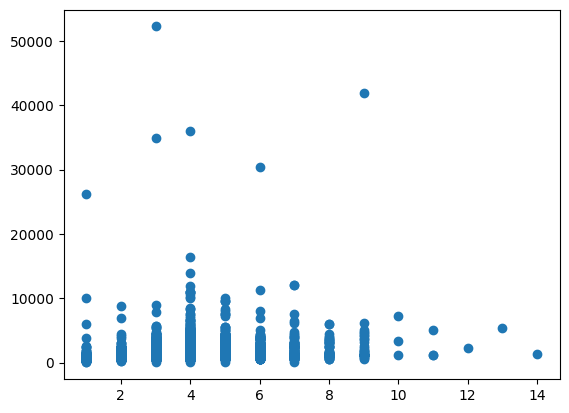

In [ ]:
mlt.scatter(x = data['size'], y = data['total_sqft'])

In [ ]:
editing_data['sqft/room'] = editing_data['total_sqft']/editing_data['size']
editing_data.sort_values(by = 'sqft/room').head(50)

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move,sqft/room
6408,Built-up Area,other,7,5.0,7.0,3.0,115.0,0,0.714286
67,Plot Area,other,3,11.0,3.0,2.0,74.0,153,3.666667
3480,Built-up Area,other,5,24.0,2.0,2.0,150.0,0,4.800000
2289,Plot Area,Whitefield,4,60.0,4.0,2.0,218.0,93,15.000000
3404,Carpet Area,other,1,15.0,1.0,0.0,30.0,0,15.000000
7146,Plot Area,Mysore Road,1,45.0,1.0,0.0,23.0,0,45.000000
3216,Plot Area,other,9,600.0,9.0,3.0,190.0,0,66.666667
10205,Plot Area,other,8,600.0,4.0,3.0,175.0,0,75.000000
7223,Plot Area,other,8,600.0,6.0,2.0,60.0,0,75.000000
3281,Plot Area,Vijayanagar,8,600.0,4.0,1.0,72.0,0,75.000000


In [ ]:
editing_data = editing_data[~(editing_data['sqft/room']<250)]
editing_data.sort_values(by = 'sqft/room')

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move,sqft/room
6962,Plot Area,other,3,750.0,3.0,2.0,155.0,0,250.000000
11909,Plot Area,Vidyaranyapura,4,1000.0,4.0,2.0,120.0,0,250.000000
9963,Plot Area,Kodigehalli,2,500.0,1.0,0.0,55.0,0,250.000000
12054,Plot Area,2nd Stage Nagarbhavi,6,1500.0,4.0,2.0,233.0,0,250.000000
3415,Carpet Area,Nagasandra,6,1500.0,5.0,1.0,130.0,0,250.000000
...,...,...,...,...,...,...,...,...,...
6770,Super built-up Area,Ulsoor,4,36000.0,4.0,2.0,450.0,0,9000.000000
10258,Plot Area,other,1,10030.0,1.0,1.0,150.0,0,10030.000000
3142,Built-up Area,Yelahanka,3,35000.0,3.0,3.0,130.0,0,11666.666667
4071,Plot Area,other,3,52272.0,2.0,1.0,140.0,0,17424.000000


In [ ]:
data = editing_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12138 entries, 0 to 12709
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12138 non-null  object 
 1   location      12138 non-null  object 
 2   size          12138 non-null  int64  
 3   total_sqft    12138 non-null  float64
 4   bath          12138 non-null  float64
 5   balcony       12138 non-null  float64
 6   price         12138 non-null  float64
 7   days_to_move  12138 non-null  int64  
 8   sqft/room     12138 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 948.3+ KB


In [ ]:
data['price/sqft'] = data['price']*100000/data['total_sqft']

<ipython-input-41-b049f0d3af1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price/sqft'] = data['price']*100000/data['total_sqft']


In [ ]:
data.describe()

,size,total_sqft,bath,balcony,price,days_to_move,sqft/room,price/sqft
count,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000,12138.000000
mean,2.620531,1537.299464,2.520432,1.584528,105.130306,39.113363,587.169304,6248.254111
std,0.942622,1176.894204,1.020085,0.809221,133.845635,88.776578,379.270976,4025.955489
min,1.000000,250.000000,1.000000,0.000000,8.000000,0.000000,250.000000,267.829813
25%,2.000000,1102.000000,2.000000,1.000000,48.457500,0.000000,486.666667,4200.000000
50%,2.000000,1280.000000,2.000000,2.000000,68.490000,0.000000,558.583333,5271.201083
75%,3.000000,1655.000000,3.000000,2.000000,110.000000,0.000000,625.000000,6874.719815
max,13.000000,52272.000000,13.000000,3.000000,2912.000000,364.000000,26136.000000,176470.588235


In [ ]:
df = data.copy()
df

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move,sqft/room,price/sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,154,528.000000,3699.810606
1,Super built-up Area,Whitefield,3,1800.0,2.0,2.0,70.00,215,600.000000,3888.888889
2,Super built-up Area,Binny Pete,3,1755.0,3.0,1.0,122.00,154,585.000000,6951.566952
3,Super built-up Area,Thanisandra,1,510.0,1.0,0.0,25.25,123,510.000000,4950.980392
4,Super built-up Area,other,3,1250.0,3.0,2.0,56.00,304,416.666667,4480.000000
...,...,...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Uttarahalli,3,1345.0,2.0,1.0,57.00,0,448.333333,4237.918216
12706,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,0,571.666667,6530.612245
12707,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,0,690.600000,6689.834926
12708,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,0,570.500000,5258.545136


In [ ]:
df_out = pd.DataFrame()
for key, subdf in df.groupby('location'):
  mean = np.mean(subdf['price/sqft'])
  std = np.std(subdf['price/sqft'])
  reduced = subdf[(subdf['price/sqft']>(mean-std))&(subdf['price/sqft']<(mean+std))]
  df_out = pd.concat([df_out, reduced], ignore_index = True)

In [ ]:
df = df_out.copy()
df.groupby(['location', 'size'])['price'].describe().sort_values(by = 'count', ascending = 0)

count        mean         std     min     25%     50%  \
location         size                                                          
other            2     941.0   60.198470   27.972096   13.50   44.00   54.89   
                 3     807.0  106.557577   66.083310   31.50   65.00   85.00   
Whitefield       2     231.0   60.287468   18.147261   32.00   45.00   58.00   
other            4     190.0  216.286842  143.609647   25.00  110.00  165.50   
Electronic City  2     185.0   44.222757   16.665002   15.00   32.49   40.00   
...                      ...         ...         ...     ...     ...     ...   
Kengeri          5       1.0  100.000000         NaN  100.00  100.00  100.00   
Kaval Byrasandra 1       1.0   25.000000         NaN   25.00   25.00   25.00   
Kathriguppe      2       1.0   68.750000         NaN   68.75   68.75   68.75   
Kasavanhalli     1       1.0   43.820000         NaN   43.82   43.82   43.82   
other            13      1.0  275.000000         NaN  275.00  275.00  275.00   

                          75%     max  
location         size                  
other            2      68.00  280.00  
                 3     120.00  499.00  
Whitefield       2      75.00  110.00  
other            4     290.00  900.00  
Electronic City  2      58.00   90.00  
...                       ...     ...  
Kengeri          5     100.00  100.00  
Kaval Byrasandra 1      25.00   25.00  
Kathriguppe      2      68.75   68.75  
Kasavanhalli     1      43.82   43.82  
other            13    275.00  275.00  

[805 rows x 8 columns]

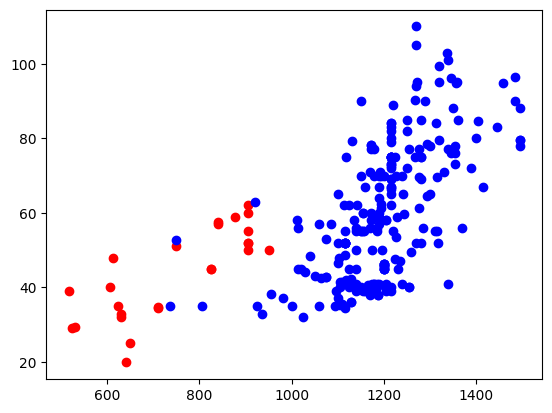

In [ ]:
bhk1 = df[(df['location']== 'Whitefield') & (df['size'] == 1)]
bhk2 = df[(df['location']== 'Whitefield') & (df['size'] == 2)]
mlt.scatter(bhk1.total_sqft, bhk1.price, color = 'Red')
mlt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue')

In [ ]:
df_out = pd.DataFrame()
for key, subdf in df.groupby(['location', 'size']):
  mean = np.mean(subdf['price'])
  std = np.std(subdf['price'])
  reduced = subdf[(subdf['price']>(mean-std))&(subdf['price']<(mean+std))]
  df_out = pd.concat([df_out, reduced], ignore_index = True)

In [ ]:
df = df_out.copy()
df

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move,sqft/room,price/sqft
0,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,335,543.333333,11901.840491
1,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,306,712.500000,15017.543860
2,Super built-up Area,1st Block Jayanagar,4,2750.0,4.0,0.0,413.0,306,687.500000,15018.181818
3,Super built-up Area,1st Phase JP Nagar,2,1077.0,2.0,2.0,93.0,304,538.500000,8635.097493
4,Super built-up Area,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0,0,697.000000,7173.601148
...,...,...,...,...,...,...,...,...,...,...
6927,Plot Area,other,8,2400.0,6.0,3.0,125.0,0,300.000000,5208.333333
6928,Plot Area,other,8,3500.0,6.0,2.0,120.0,0,437.500000,3428.571429
6929,Built-up Area,other,8,2500.0,8.0,3.0,95.0,0,312.500000,3800.000000
6930,Carpet Area,other,8,3150.0,5.0,2.0,145.0,0,393.750000,4603.174603


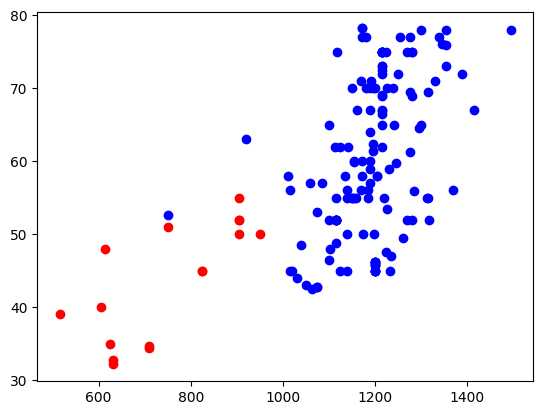

In [ ]:
bhk1 = df[(df['location']== 'Whitefield') & (df['size'] == 1)]
bhk2 = df[(df['location']== 'Whitefield') & (df['size'] == 2)]
mlt.scatter(bhk1.total_sqft, bhk1.price, color = 'Red')
mlt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue')

(array([6.600e+02, 4.100e+03, 1.684e+03, 2.740e+02, 1.320e+02, 4.900e+01,
        2.100e+01, 8.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1300.        ,  3541.91650854,  5783.83301708,  8025.74952562,
        10267.66603416, 12509.58254269, 14751.49905123, 16993.41555977,
        19235.33206831, 21477.24857685, 23719.16508539]),
 <BarContainer object of 10 artists>)

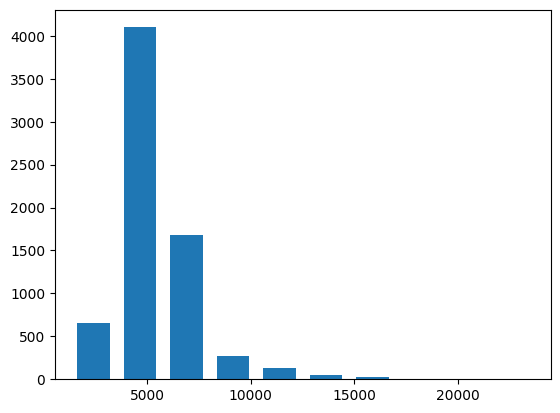

In [ ]:
mlt.hist(df['price/sqft'], rwidth = 0.7)

In [ ]:
data = df.drop(['sqft/room', 'price/sqft'], axis = 1)
data

,area_type,location,size,total_sqft,bath,balcony,price,days_to_move
0,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,335
1,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,306
2,Super built-up Area,1st Block Jayanagar,4,2750.0,4.0,0.0,413.0,306
3,Super built-up Area,1st Phase JP Nagar,2,1077.0,2.0,2.0,93.0,304
4,Super built-up Area,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0,0
...,...,...,...,...,...,...,...,...
6927,Plot Area,other,8,2400.0,6.0,3.0,125.0,0
6928,Plot Area,other,8,3500.0,6.0,2.0,120.0,0
6929,Built-up Area,other,8,2500.0,8.0,3.0,95.0,0
6930,Carpet Area,other,8,3150.0,5.0,2.0,145.0,0


MODEL

In [ ]:
df = pd.concat([data.drop(['location', 'area_type'], axis = 1), pd.get_dummies(data['area_type']), pd.get_dummies(data['location'])], axis = 1)
df

,size,total_sqft,bath,balcony,price,days_to_move,Built-up Area,Carpet Area,Plot Area,Super built-up Area,...,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,1630.0,3.0,2.0,194.0,335,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4,2850.0,4.0,1.0,428.0,306,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,2750.0,4.0,0.0,413.0,306,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,1077.0,2.0,2.0,93.0,304,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,1394.0,2.0,1.0,100.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6927,8,2400.0,6.0,3.0,125.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6928,8,3500.0,6.0,2.0,120.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6929,8,2500.0,8.0,3.0,95.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6930,8,3150.0,5.0,2.0,145.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.set_option('display.max_columns', None)
df

,size,total_sqft,bath,balcony,price,days_to_move,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basapura,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dairy Circle,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Ganga Nagar,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,Gunjur Palya,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalkere,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Naganathapura,Nagappa Reddy Layout,Nagarbhavi,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,1630.0,3.0,2.0,194.0,335,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2850.0,4.0,1.0,428.0,306,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 13)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
 regression_model.predict(x_test)

array([ 63.97121525,  97.70169568,  37.34801888,  63.86471987,
        40.14648438, 108.94226789,  43.76969671,  87.43635631,
        56.58473492,  92.83656812,  59.57920313,  59.81130576,
        77.33333182,  76.43370032, 121.29881048, 139.13389134,
       269.06634736,  61.21217275,  75.09347558,  62.45759106,
        68.86021113,  -0.69644356,  78.45738482,  43.38074589,
        67.41112733,  52.79841971,  20.51266003, 307.30253839,
        44.85790706,  86.17985034,  62.69999957,  60.13962293,
        82.19031072,  66.20062518,  73.76004457,  43.06993604,
       103.35427022,  30.14292765,  30.26190662,  86.54426003,
        34.2760663 , 100.43946671,  66.93645716,  35.19846916,
        35.11087513,  87.31764412,  54.20927501,  70.13574982,
        75.36151481,  69.66610479,  99.6419785 ,  46.13779068,
        66.88425899,  66.88310909,  43.30613303,  77.18440127,
        44.32959175, 126.3331337 ,  69.33337641,  54.69272327,
        52.01124024,  79.94164681, 115.5038321 ,  95.20

In [ ]:
regression_model.score(x_test, y_test)

0.9104741620883863

In [ ]:
mean_absolute_error(y_test, regression_model.predict(x_test))

11.20498036466326

In [ ]:
mean_absolute_percentage_error(y_test, regression_model.predict(x_test))

0.1551685489669328

In [ ]:
cross_val_score(LinearRegression(), x, y, cv = ShuffleSplit(n_splits = 5, test_size = 0.1, random_state = 0))

array([0.82635354, 0.87599405, 0.83994412, 0.85190285, 0.86420192])

In [ ]:
with open("/content/regression_model.pickle", 'wb') as f:
  pickle.dump(regression_model, f)
columns = {'data_columns' : [col.lower() for col in x.columns]}
with open("/content/columns.json", 'w') as f:
  f.write(json.dumps(columns))

In [ ]:
x.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'days_to_move',
       'Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area',
       '1st Block Jayanagar',
       ...
       'Vijayanagar', 'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'],
      dtype='object', length=249)

In [ ]:
from pandas.core.arrays.numeric import T
def pred_price(size, total_sqft, bath, balcony, days_to_move, area_type, location):
  area_type = np.where(x.columns == area_type)[0][0]
  location = np.where(x.columns == location)[0][0]

  t = np.zeros(len(x.columns))
  t[0] = size
  t[1] = total_sqft
  t[2] = bath
  t[3] = balcony
  t[4] = days_to_move
  if(area_type) >= 0:
    t[area_type] = 1
  if(area_type) >= 0:
    t[location] = 1
  return regression_model.predict([t])[0]

In [ ]:
pred_price(2, 1077.0, 2.0, 2.0, 304, 'Super built-up  Area', '1st Phase JP Nagar')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.51277709007263